Проверяем гипотезу

Поля, на которых проводилось больше работ по обработке и уходу, показывают более высокую урожайность.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import norm 

In [ ]:
dfw = pd.read_csv('works.csv', encoding='1251', sep=';', decimal=',')
dfw.head()

,season,field,work_type,work_subtype,start_date,end_date,area,main_tech,add_tech,mech,proc_depth,prod_purpose,prod_weight,prod_dry_perc,prod_humid,prod_impur,yield_fact,work_id
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,"49,78","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,A06AD38A-5448-40EC-B095-4B8918B4AC10
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,"154,76","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,62B13DCE-FFB5-4E7A-8F1B-88930BD338EF
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"40,62","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,D5884A6D-4710-4C0A-8E5A-878291B89846
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"86,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,NaN,NaN,NaN,0.0,7A504837-1127-4315-ACF1-171AC80111BF
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"76,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,NaN,NaN,NaN,0.0,7FE86DA8-614B-4EBE-85CB-6AF80C08689F


In [24]:
dfw.isna().sum()

season                0
field                 0
work_type             0
work_subtype          0
start_date            0
end_date           9004
area                  0
main_tech             0
add_tech          48540
mech                  0
proc_depth       132562
prod_purpose     140822
prod_weight           0
prod_dry_perc    161715
prod_humid       151128
prod_impur       151128
yield_fact            0
work_id               0
dtype: int64

In [25]:
dfw['field'].value_counts()

field
54.17.02.015.00    297
54.17.12.033.00    237
54.28.07.021.01    229
56.28.07.005.00    223
02.23.03.002.00    185
                  ... 
36.14.19.042.04      1
40.23.08.019.01      1
36.14.12.098.02      1
54.17.01.016.02      1
36.02.19.076.03      1
Name: count, Length: 6942, dtype: int64

In [26]:
# count_works = dfw['field'].value_counts()
# dfw['count_works'] = dfw['field'].apply(lambda x:count_works[x])
dfw['count_works'] = dfw.groupby(['field', 'season'],as_index=False).transform(len)['work_subtype']
dfw.head()

,season,field,work_type,work_subtype,start_date,end_date,area,main_tech,add_tech,mech,proc_depth,prod_purpose,prod_weight,prod_dry_perc,prod_humid,prod_impur,yield_fact,work_id,count_works
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,"49,78","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,A06AD38A-5448-40EC-B095-4B8918B4AC10,17
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,"154,76","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,62B13DCE-FFB5-4E7A-8F1B-88930BD338EF,36
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"40,62","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,D5884A6D-4710-4C0A-8E5A-878291B89846,17
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"86,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,NaN,NaN,NaN,0.0,7A504837-1127-4315-ACF1-171AC80111BF,17
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"76,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,NaN,NaN,NaN,0.0,7FE86DA8-614B-4EBE-85CB-6AF80C08689F,36


In [27]:
kstest(dfw['count_works'], "norm"), kstest(dfw['yield_fact'], "norm")

(KstestResult(statistic=np.float64(0.9899085529910796), pvalue=np.float64(0.0), statistic_location=np.int64(3), statistic_sign=np.int8(-1)),
 KstestResult(statistic=np.float64(0.5), pvalue=np.float64(0.0), statistic_location=np.float64(0.0), statistic_sign=np.int8(-1)))

In [28]:
shapiro(dfw['count_works']), shapiro(dfw['yield_fact'])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 174683.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=np.float64(0.7871710848337622), pvalue=np.float64(4.28458286670148e-147)),
 ShapiroResult(statistic=np.float64(0.008089100607851729), pvalue=np.float64(6.874039714113583e-200)))

### Распределение нормальное, значит, корреляицю ищем по Пирсону

<Axes: xlabel='count_works', ylabel='yield_fact'>

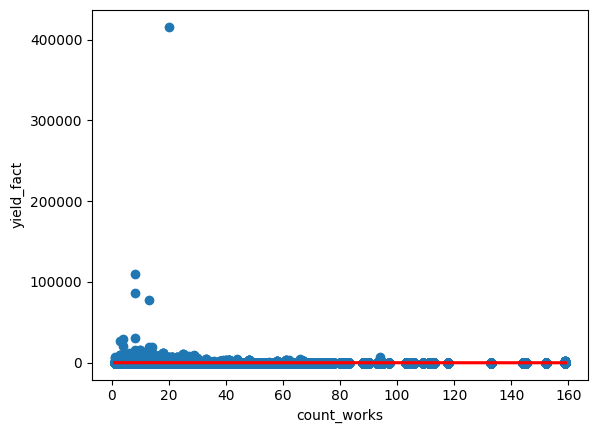

In [29]:
plt.scatter(x=dfw['count_works'], y=dfw['yield_fact'])
sns.regplot(x=dfw['count_works'], y=dfw['yield_fact'], scatter=False, color='red', label='Линия регрессии')

<Axes: xlabel='yield_fact', ylabel='Count'>

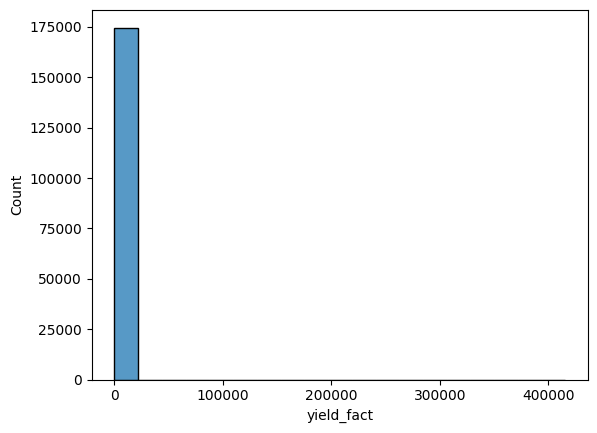

In [30]:
sns.histplot(dfw['yield_fact'])

Определенно выдно существование супервыбросово y, удалим их

In [31]:
'''
iqr = 3 * (dfw['yield_fact'].quantile(0.75) - dfw['yield_fact'].quantile(0.25))
meann = dfw['yield_fact'].mean()
''' # интеркваль не работает, тк он равен 0
dfw = dfw[dfw['yield_fact'] <= dfw['yield_fact'].quantile(0.99)]

<Axes: xlabel='yield_fact', ylabel='Count'>

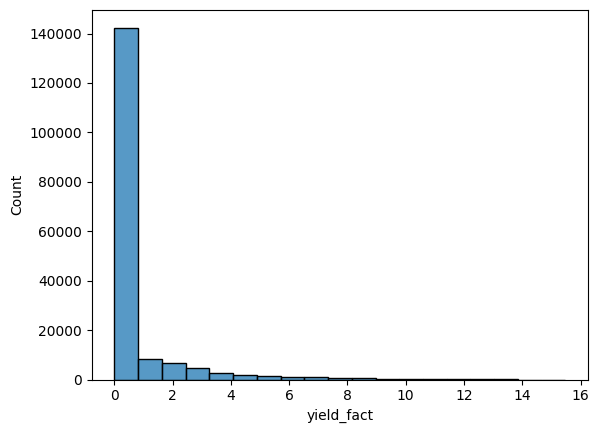

In [32]:
sns.histplot(dfw['yield_fact'])

<Axes: xlabel='count_works', ylabel='yield_fact'>

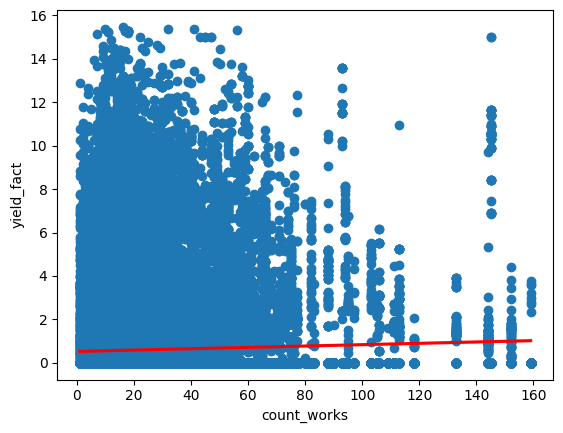

In [33]:
plt.scatter(x=dfw['count_works'], y=dfw['yield_fact'])
sns.regplot(x=dfw['count_works'], y=dfw['yield_fact'], scatter=False, color='red', label='Линия регрессии')

In [34]:
dfw.corr(numeric_only=1)['count_works']['yield_fact']

np.float64(0.0362697981074067)

Категоризируем по 50 (почему нет) работ на поле:  # я бы сделал по перцентилям

In [37]:

"""dfw_1 = dfw[dfw['count_works'] <= 25] # на 50 получалось СЛИШКОМ много
dfw_2 = dfw[(dfw['count_works'] <= 50) & (dfw['count_works'] > 25)]
dfw_3 = dfw[(dfw['count_works'] <= 100) & (dfw['count_works'] > 50)]
dfw_4 = dfw[(dfw['count_works'] <= 150) & (dfw['count_works'] > 100)]
dfw_5 = dfw[(dfw['count_works'] <= 200) & (dfw['count_works'] > 150)]
dfw_6 = dfw[(dfw['count_works'] <= 250) & (dfw['count_works'] > 200)]
dfw_7 = dfw[(dfw['count_works'] <= 300) & (dfw['count_works'] > 250)]"""
dfw_1 = dfw[dfw['count_works'] <= dfw['count_works'].quantile(0.20)]
dfw_2 = dfw[(dfw['count_works'] > dfw['count_works'].quantile(0.20)) & (dfw['count_works'] <= dfw['count_works'].quantile(0.40))]
dfw_3 = dfw[(dfw['count_works'] > dfw['count_works'].quantile(0.40)) & (dfw['count_works'] <= dfw['count_works'].quantile(0.60))]
dfw_4 = dfw[(dfw['count_works'] > dfw['count_works'].quantile(0.60)) & (dfw['count_works'] <= dfw['count_works'].quantile(0.80))]
dfw_5 = dfw[dfw['count_works'] > dfw['count_works'].quantile(0.80)]


In [38]:
from scipy import stats

Нулевая гипотеза: все значения одинаковые

In [39]:
def check_hypothesis_anova(*args, alpha=0.05):
    f_stat, p_value = stats.f_oneway(*args)
    
    # Проверка нулевой гипотезы
    if p_value < alpha:
        conclusion = "Отвергаем нулевую гипотезу: Средние значения групп различаются."
    else:
        conclusion = "Не удается отвергнуть нулевую гипотезу: Средние значения групп не различаются."
    
    return f_stat, p_value, conclusion
f_stat, p_value, conclusion = check_hypothesis_anova(dfw_1['yield_fact'], dfw_2['yield_fact'], dfw_3['yield_fact'], dfw_4['yield_fact'],
                                                     dfw_5['yield_fact'])
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
print(conclusion)

F-statistic: 65.0730, p-value: 0.0000
Отвергаем нулевую гипотезу: Средние значения групп различаются.


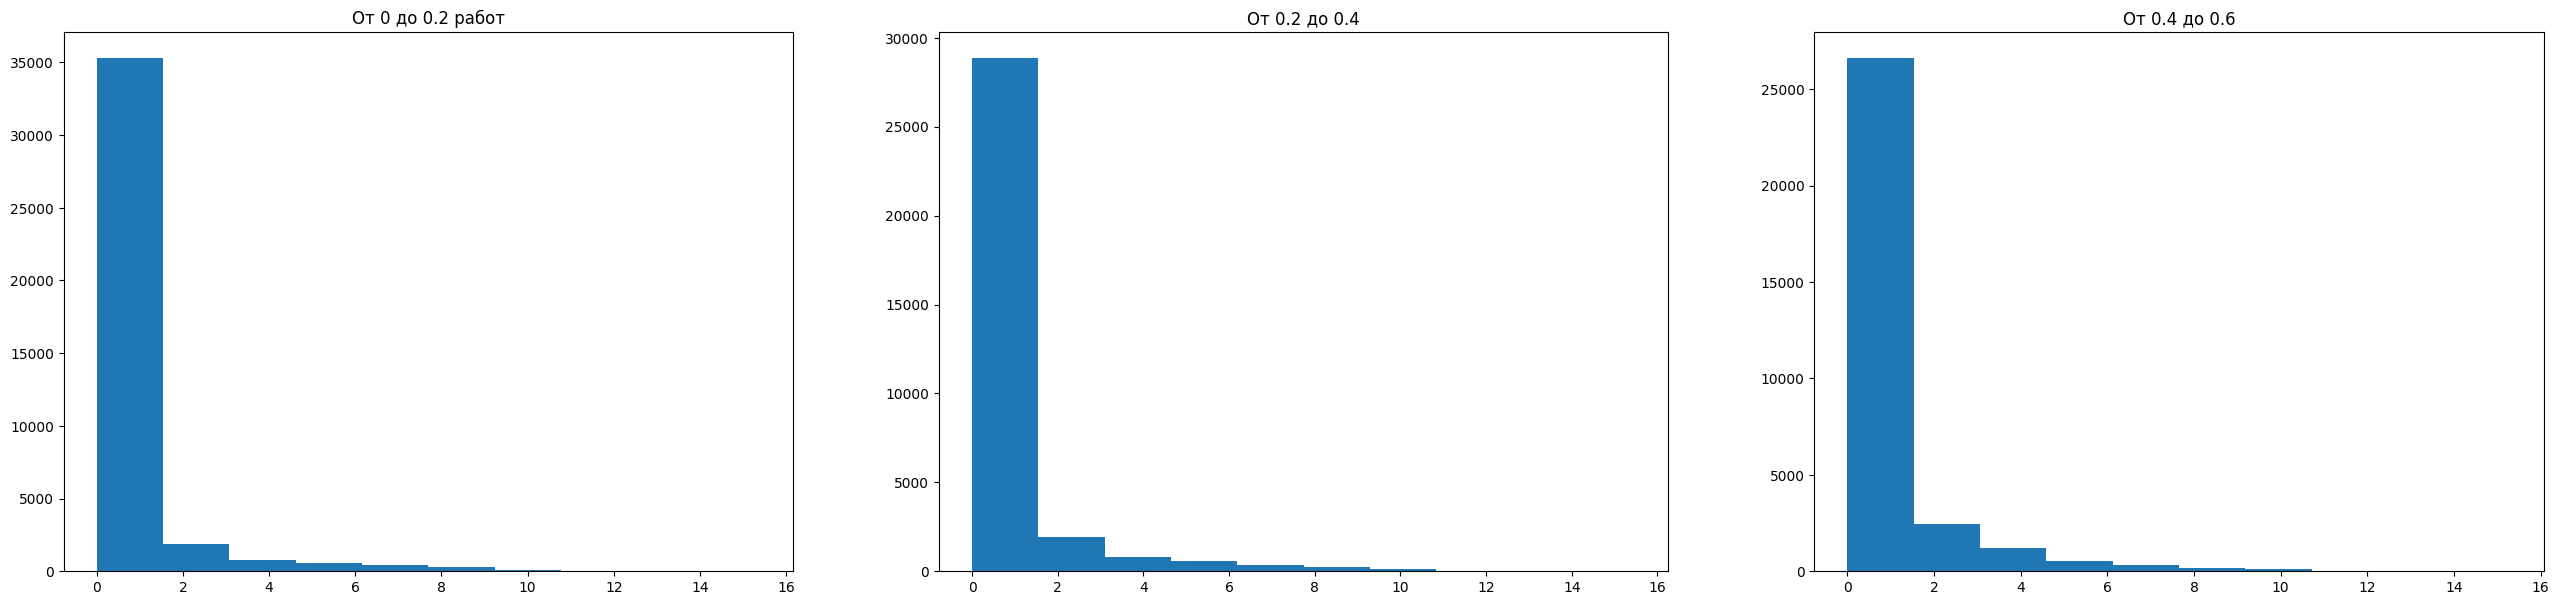

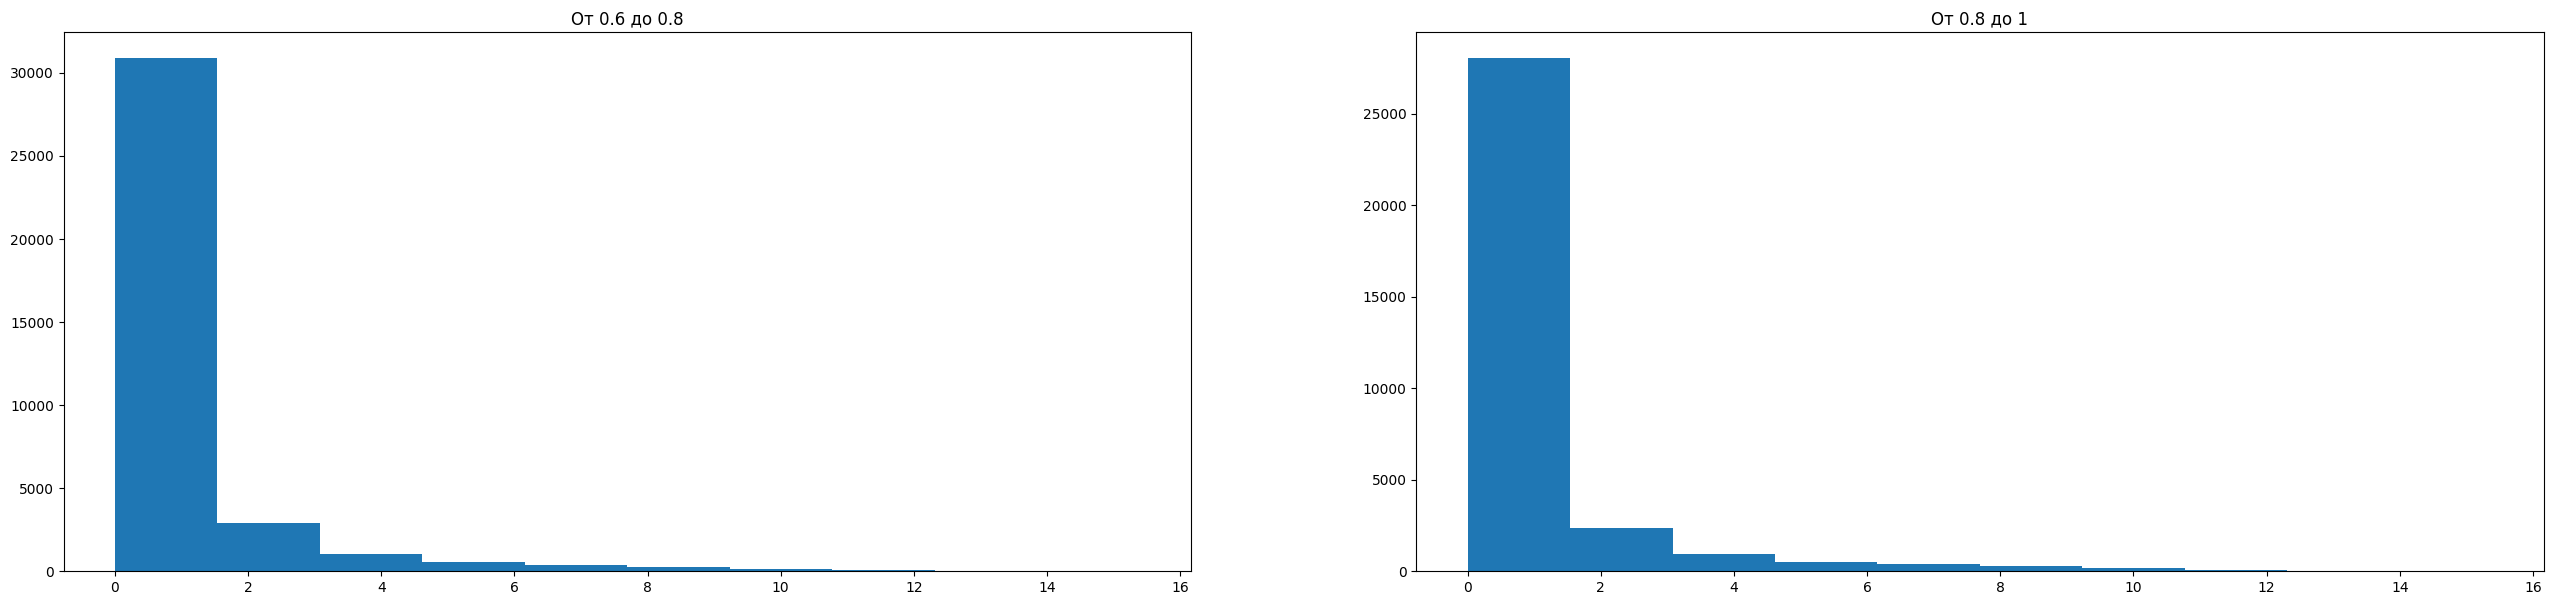

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(32, 7))
ax[0].hist(dfw_1['yield_fact'])
ax[0].set_title('От 0 до 0.2 работ')
ax[1].hist(dfw_2['yield_fact'])
ax[1].set_title('От 0.2 до 0.4')
ax[2].hist(dfw_3['yield_fact'])
ax[2].set_title('От 0.4 до 0.6')
plt.show()

f, ax = plt.subplots(1, 2, figsize=(32, 7))
ax[0].hist(dfw_4['yield_fact'])
ax[0].set_title('От 0.6 до 0.8')
ax[1].hist(dfw_5['yield_fact'])
ax[1].set_title('От 0.8 до 1')
plt.show()

"""f, ax = plt.subplots(1, 4, figsize=(32, 7))
ax[0].hist(dfw_1['yield_fact'])
ax[0].set_title('От 0 до 25 работ')
ax[1].hist(dfw_2['yield_fact'])
ax[1].set_title('От 25 до 50')
ax[2].hist(dfw_3['yield_fact'])
ax[2].set_title('От 50 до 100')
ax[3].hist(dfw_4['yield_fact'])
ax[3].set_title('От 100 до 150')
plt.show()
f, ax = plt.subplots(1, 3, figsize=(32, 7))
ax[0].hist(dfw_5['yield_fact'])
ax[0].set_title('От 150 до 200 работ')
ax[1].hist(dfw_6['yield_fact'])
ax[1].set_title('От 200 до 250')
ax[2].hist(dfw_7['yield_fact'])
ax[2].set_title('От 250 до 300')"""

Распределение похожее

In [44]:
print("Средние значения")
print(f'От 0 до 0.2 работ: {dfw_1["yield_fact"].mean()}')
print(f'От 0.2 до 0.4: {dfw_2["yield_fact"].mean()}')
print(f'От 0.4 до 0.6: {dfw_3["yield_fact"].mean()}')
print(f'От 0.6 до 0.8: {dfw_4["yield_fact"].mean()}')
print(f'От 0.8 до 0.1: {dfw_5["yield_fact"].mean()}')
# print(f'От 200 до 250: {dfw_6["yield_fact"].mean()}')
# print(f'От 250 до 300: {dfw_7["yield_fact"].mean()}')

Средние значения
От 0 до 0.2 работ: 0.5012019766852509
От 0.2 до 0.4: 0.5665364282676066
От 0.4 до 0.6: 0.6407987159520707
От 0.6 до 0.8: 0.6246588365344756
От 0.8 до 0.1: 0.6771149055113325
